# EDA Notebook

## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Dataset

In [2]:
path = Path().resolve().parent / "data" / "dataproject2025.csv"
df = pd.read_csv(path, index_col=0)

In [3]:
df.columns

Index(['issue_d', 'loan duration', 'annual_inc', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'delinq_2yrs', 'dti', 'emp_length',
       'emp_title', 'fico_range_high', 'funded_amnt', 'grade',
       'home_ownership', 'inq_last_6mths', 'int_rate', 'mo_sin_old_rev_tl_op',
       'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc',
       'mths_since_recent_bc', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl',
       'num_rev_accts', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies',
       'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'target',
       'tax_liens', 'zip_code', 'Pct_afro_american', 'Predictions',
       'Predicted probabilities'],
      dtype='object')

Categorical columns

In [4]:
# Categorical columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['emp_length', 'emp_title', 'grade', 'home_ownership', 'purpose', 'sub_grade']


Numerical columns

In [5]:
# Numerical columns
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['issue_d', 'loan duration', 'annual_inc', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'delinq_2yrs', 'dti', 'fico_range_high', 'funded_amnt', 'inq_last_6mths', 'int_rate', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'num_actv_bc_tl', 'num_bc_tl', 'num_il_tl', 'num_rev_accts', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'target', 'tax_liens', 'zip_code', 'Pct_afro_american', 'Predictions', 'Predicted probabilities']


#### Correlation matrix

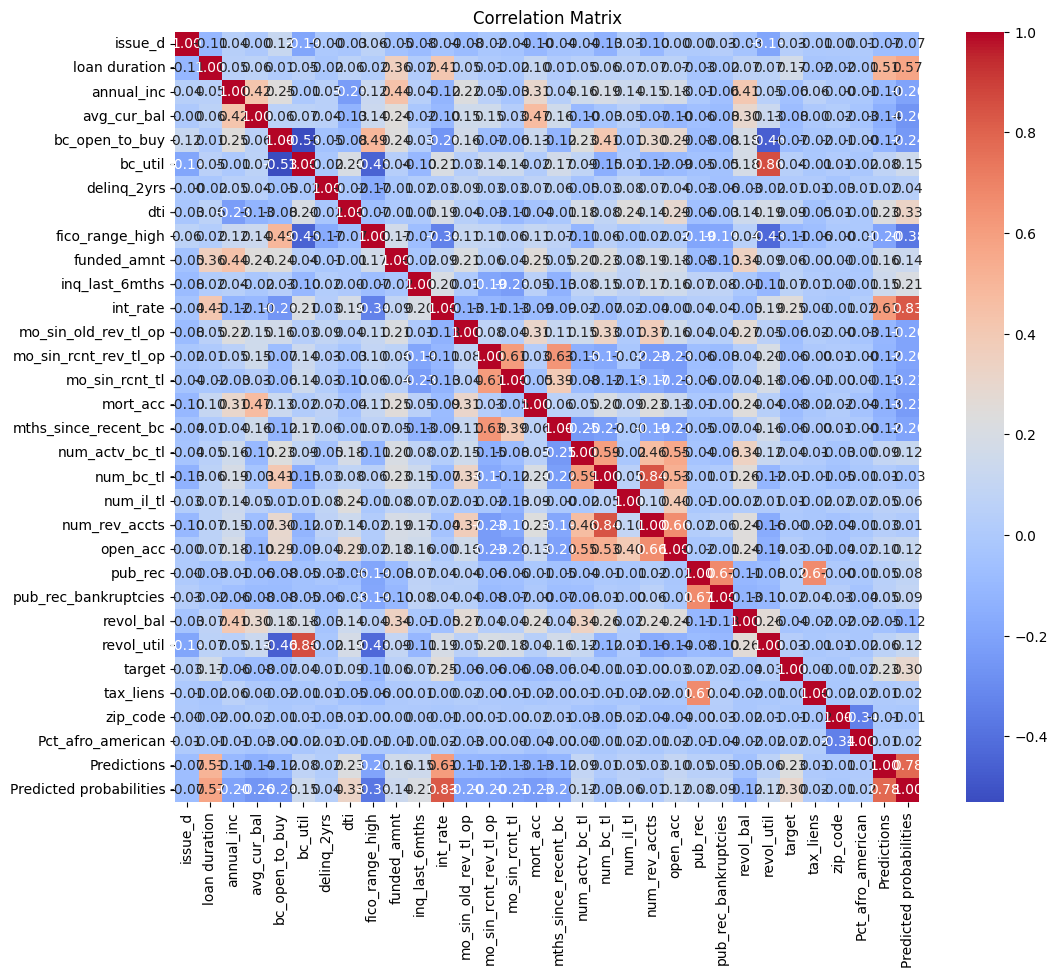

In [6]:
# Correlation matrix

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

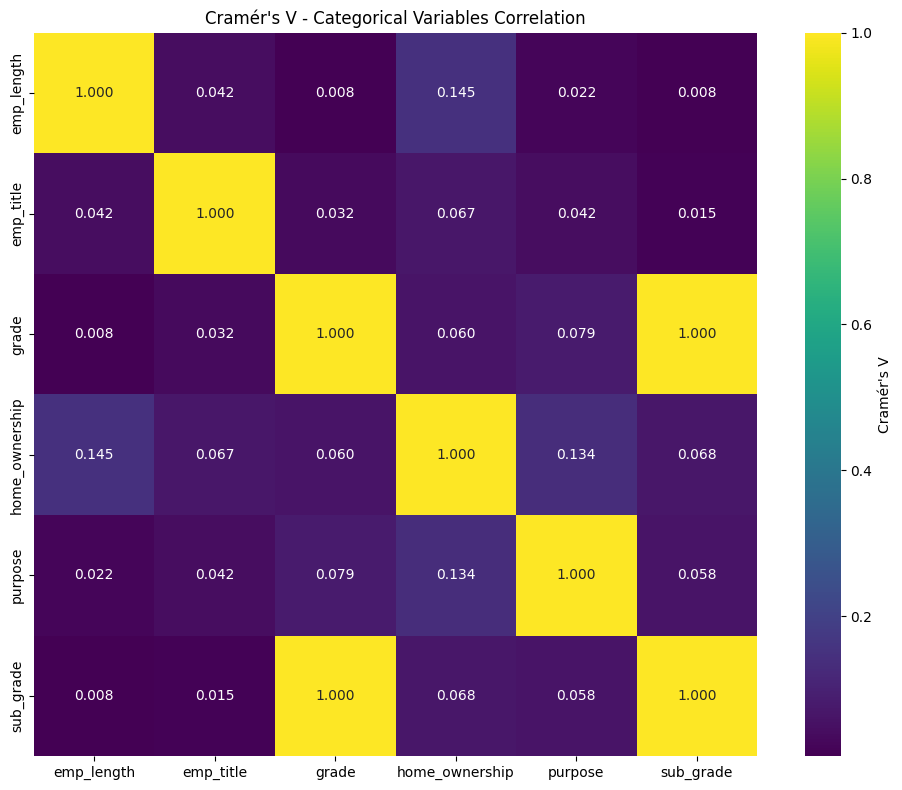

Cramér's V Matrix:
                emp_length  emp_title     grade  home_ownership   purpose  \
emp_length        1.000000   0.042002  0.008166        0.145088  0.021763   
emp_title         0.042002   1.000000  0.032408        0.067057  0.041902   
grade             0.008166   0.032408  1.000000        0.059696  0.079286   
home_ownership    0.145088   0.067057  0.059696        1.000000  0.134375   
purpose           0.021763   0.041902  0.079286        0.134375  1.000000   
sub_grade         0.007965   0.014956  0.999987        0.068128  0.058440   

                sub_grade  
emp_length       0.007965  
emp_title        0.014956  
grade            0.999987  
home_ownership   0.068128  
purpose          0.058440  
sub_grade        1.000000  


In [7]:
# Correlation between categorical variables using sklearn
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder


def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


# Calculate Cramér's V for all pairs of categorical variables
if len(categorical_cols) > 1:
    cramers_v_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

    for i, col1 in enumerate(categorical_cols):
        for j, col2 in enumerate(categorical_cols):
            if i == j:
                cramers_v_matrix.loc[col1, col2] = 1.0
            else:
                # Remove missing values for this pair
                mask = df[col1].notna() & df[col2].notna()
                if mask.sum() > 0:
                    cramers_v_matrix.loc[col1, col2] = cramers_v(
                        df.loc[mask, col1], df.loc[mask, col2]
                    )
                else:
                    cramers_v_matrix.loc[col1, col2] = 0.0

    # Convert to numeric
    cramers_v_matrix = cramers_v_matrix.astype(float)

    # Plot Cramér's V heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cramers_v_matrix,
        annot=True,
        fmt=".3f",
        cmap="viridis",
        square=True,
        cbar_kws={"label": "Cramér's V"},
    )
    plt.title("Cramér's V - Categorical Variables Correlation")
    plt.tight_layout()
    plt.show()

    print("Cramér's V Matrix:")
    print(cramers_v_matrix)
else:
    print("Need at least 2 categorical variables to compute correlation")

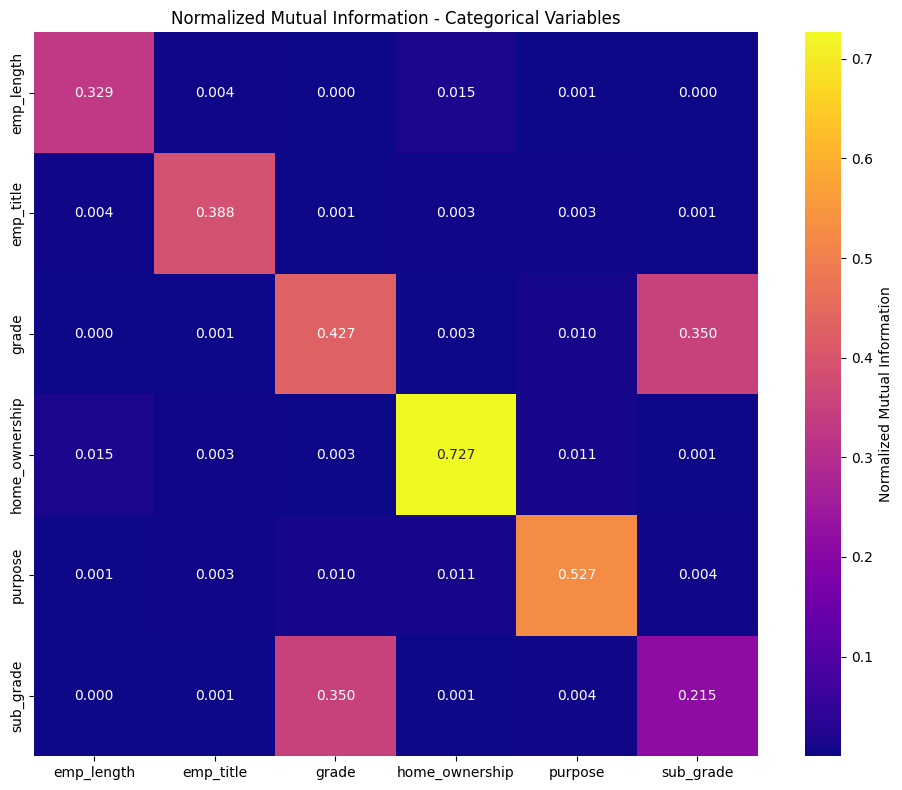

Mutual Information Matrix (normalized):
                emp_length  emp_title  grade  home_ownership  purpose  \
emp_length           0.329      0.004  0.000           0.015    0.001   
emp_title            0.004      0.388  0.001           0.003    0.003   
grade                0.000      0.001  0.427           0.003    0.010   
home_ownership       0.015      0.003  0.003           0.727    0.011   
purpose              0.001      0.003  0.010           0.011    0.527   
sub_grade            0.000      0.001  0.350           0.001    0.004   

                sub_grade  
emp_length          0.000  
emp_title           0.001  
grade               0.350  
home_ownership      0.001  
purpose             0.004  
sub_grade           0.215  


In [8]:
# Alternative: Mutual Information for categorical variables

if len(categorical_cols) > 1:
    # Encode categorical variables
    le_dict = {}
    encoded_data = pd.DataFrame()

    for col in categorical_cols:
        le = LabelEncoder()
        # Handle missing values by filling with 'missing'
        temp_data = df[col].fillna("missing")
        encoded_data[col] = le.fit_transform(temp_data)
        le_dict[col] = le

    # Calculate mutual information matrix
    mi_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

    for col1 in categorical_cols:
        mi_scores = []
        for col2 in categorical_cols:
            if col1 == col2:
                mi_scores.append(1.0)  # Perfect correlation with itself
            else:
                # Calculate mutual information
                mi_score = mutual_info_classif(
                    encoded_data[col2].values.reshape(-1, 1),
                    encoded_data[col1].values,
                    discrete_features=True,
                    random_state=42,
                )[0]
                mi_scores.append(mi_score)
        mi_matrix.loc[col1] = mi_scores

    # Convert to numeric
    mi_matrix = mi_matrix.astype(float)

    # Normalize MI scores (optional - divide by entropy)
    mi_matrix_norm = mi_matrix.copy()
    for i, col in enumerate(categorical_cols):
        entropy = -np.sum(
            encoded_data[col].value_counts(normalize=True)
            * np.log2(encoded_data[col].value_counts(normalize=True))
        )
        if entropy > 0:
            mi_matrix_norm.iloc[i] = mi_matrix.iloc[i] / entropy
            mi_matrix_norm.iloc[:, i] = mi_matrix.iloc[:, i] / entropy

    # Plot Mutual Information heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        mi_matrix_norm,
        annot=True,
        fmt=".3f",
        cmap="plasma",
        square=True,
        cbar_kws={"label": "Normalized Mutual Information"},
    )
    plt.title("Normalized Mutual Information - Categorical Variables")
    plt.tight_layout()
    plt.show()

    print("Mutual Information Matrix (normalized):")
    print(mi_matrix_norm.round(3))
else:
    print("Need at least 2 categorical variables for mutual information analysis")

In [10]:
true_labels = df["target"]
predicted_labels = df["Predictions"]

In [16]:
accuracy = (true_labels == predicted_labels).sum() / len(true_labels)
print(f"Accuracy: {accuracy:.4f}")

recall = (true_labels & predicted_labels).sum() / true_labels.sum()
print(f"Recall: {recall:.4f}")

precision = (true_labels & predicted_labels).sum() / predicted_labels.sum()
print(f"Precision: {precision:.4f}")

Accuracy: 0.7546
Recall: 0.3652
Precision: 0.4074
